In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")
%matplotlib inline

In [6]:
from sklearn.datasets import load_boston
Boston_data = load_boston()
Boston_data
df = pd.DataFrame(Boston_data.data, columns=Boston_data.feature_names)

In [7]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [11]:
y = Boston_data.target
y.shape

(506,)

In [102]:
X = df[['LSTAT']].values
#X = df.values
X.shape

(506, 1)

# With Gradient Descent

In [103]:
alpha = 0.0001
cost_ = []
w_ = np.zeros(1+X.shape[1])
print(w_)
n_ = 50
for i in range(n_):
    y_pred = np.dot(X,w_[1:]) + w_[0]
    error = (y - y_pred)
    
    w_[1:] += alpha * np.dot(X.T,error) 
    w_[0] += alpha * error.sum()
    
    cost = (error ** 2).sum()/2.0
    cost_.append(cost)

[0. 0.]


In [104]:
w_[1:].shape

(1,)

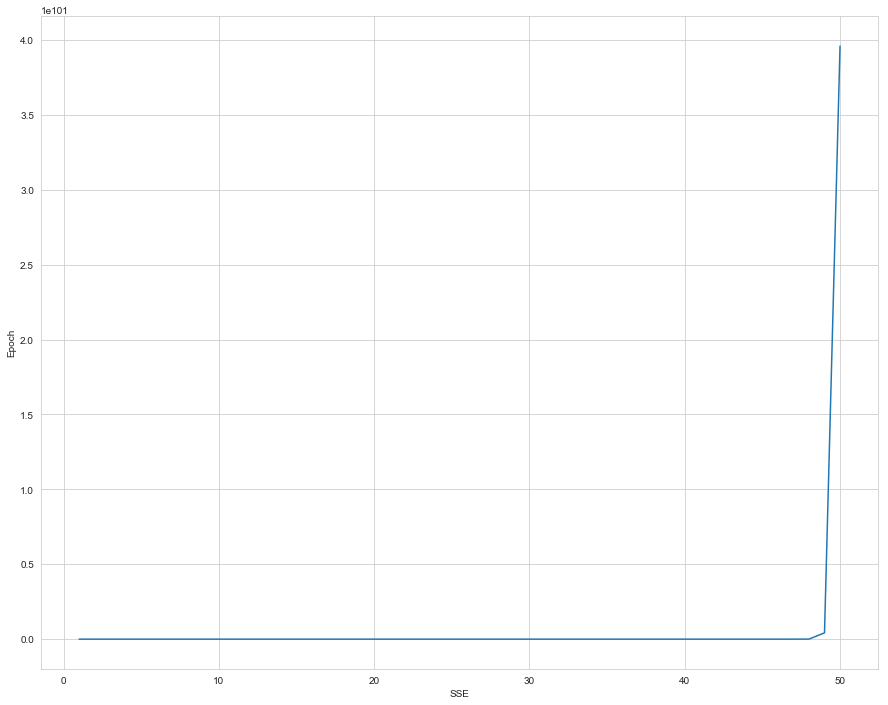

In [105]:
plt.figure(figsize=(15,12))
plt.plot(range(1,n_+1),cost_)
plt.xlabel('SSE')
plt.ylabel('Epoch');

In [106]:
from sklearn.preprocessing import StandardScaler

In [115]:
X_sca = StandardScaler().fit_transform(X.reshape(-1,1))
y_sca = StandardScaler().fit_transform(y.reshape(-1,1)).flatten()
X_sca.T.shape

(1, 506)

In [116]:
alpha = 0.0001
cost_ = []
w_ = np.zeros(1+X_sca.shape[1])
print(w_)
n_ = 100
for i in range(n_):
    y_pred = np.dot(X_sca,w_[1:]) + w_[0]
    #print(w_[1:].shape)
    error = (y_sca - y_pred)
    
    w_[1:] += alpha * np.dot(X_sca.T,error) 
    w_[0] += alpha * error.sum()
    
    cost = (error ** 2).sum()/2.0
    cost_.append(cost)

[0. 0.]


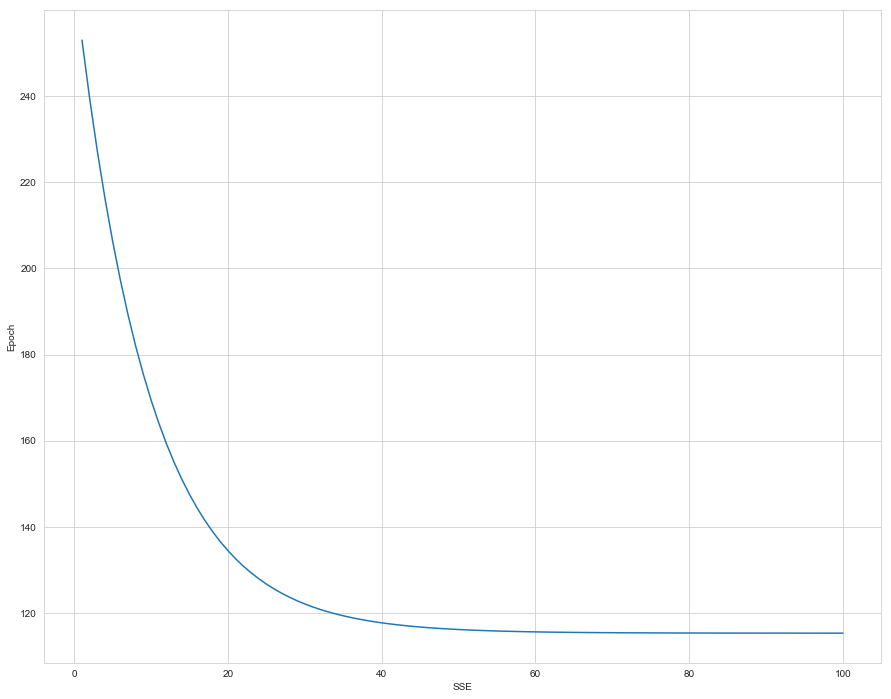

In [117]:
plt.figure(figsize=(15,12))
plt.plot(range(1,n_+1),cost_)
plt.xlabel('SSE')
plt.ylabel('Epoch');

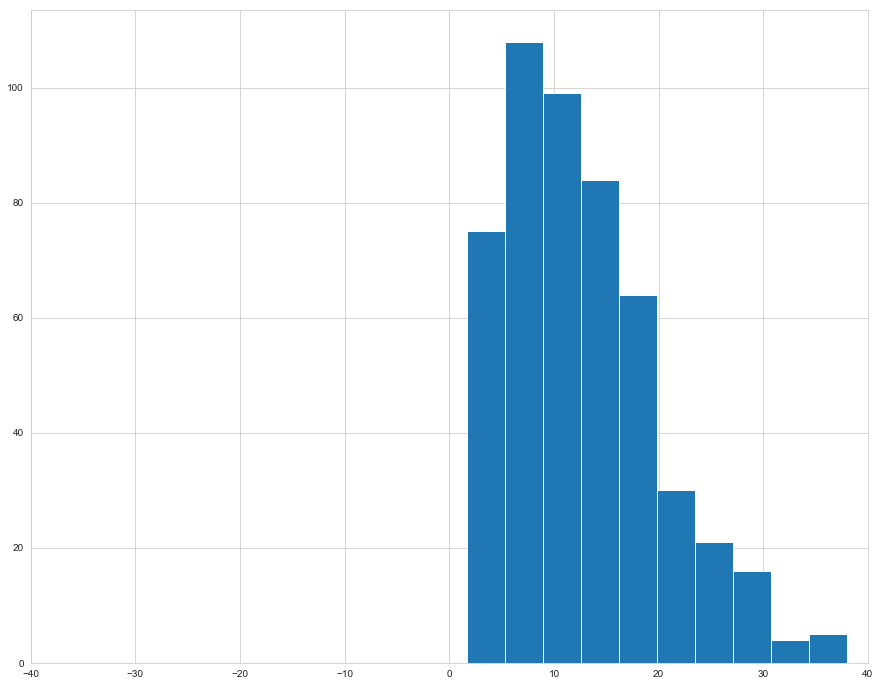

In [122]:
plt.figure(figsize=(15,12))
plt.hist(X)
plt.xlim(-40,40);

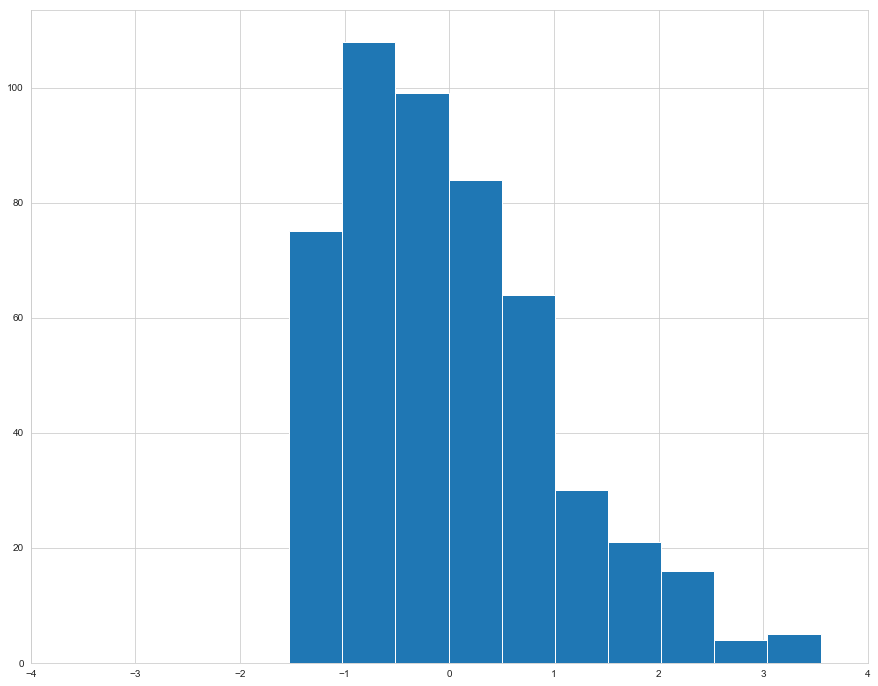

In [123]:
plt.figure(figsize=(15,12))
plt.hist(X_sca)
plt.xlim(-4,4);

In [190]:
X_train = np.array([[ 1., -1.,  2.],
                    [ 2.,  0.,  0.],
                    [ 0.,  1., -1.]])

In [191]:
from sklearn import preprocessing

In [192]:
X_scale = preprocessing.scale(X_train)

In [193]:
X_scale

array([[ 0.        , -1.22474487,  1.33630621],
       [ 1.22474487,  0.        , -0.26726124],
       [-1.22474487,  1.22474487, -1.06904497]])

In [194]:
X_scale.mean(axis=0)

array([0., 0., 0.])

In [195]:
X_scale.std(axis=0)

array([1., 1., 1.])

In [196]:
scaler = preprocessing.StandardScaler().fit(X_train)
scaler

StandardScaler(copy=True, with_mean=True, with_std=True)

In [197]:
scaler.mean_

array([1.        , 0.        , 0.33333333])

In [198]:
scaler.scale_

array([0.81649658, 0.81649658, 1.24721913])

In [199]:
scaler.transform(X_train)

array([[ 0.        , -1.22474487,  1.33630621],
       [ 1.22474487,  0.        , -0.26726124],
       [-1.22474487,  1.22474487, -1.06904497]])

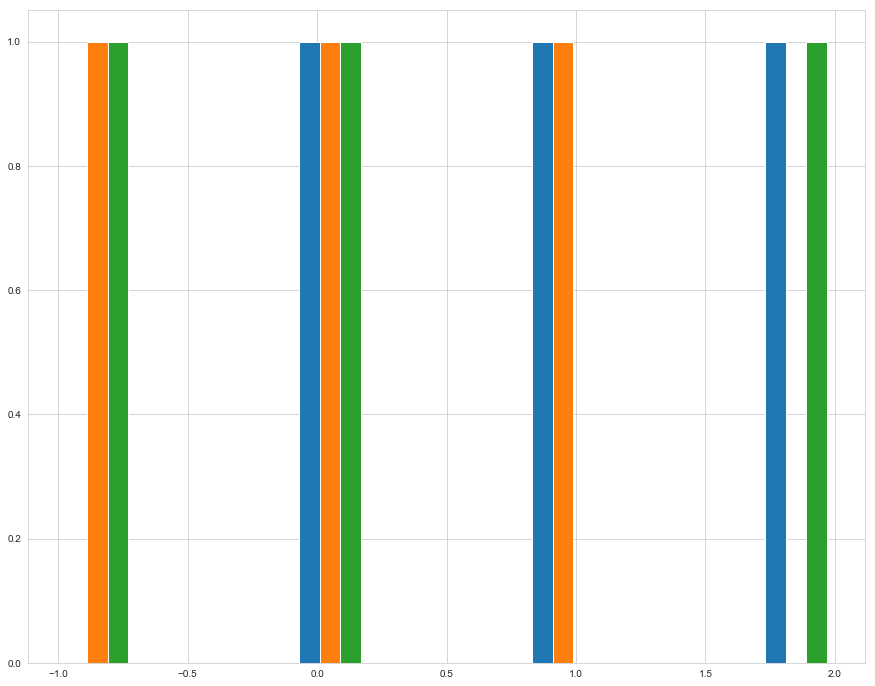

In [200]:
plt.figure(figsize=(15,12))
plt.hist(X_train);

In [201]:
scaler.transform([[-1, 1, 0]])

array([[-2.44948974,  1.22474487, -0.26726124]])